In [1]:
# !pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q git+https://github.com/allansdefreitas/yolov10.git
!pip install -q supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 29.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68

In [2]:
!wget https://github.com/moured/YOLOv10-Document-Layout-Analysis/releases/download/doclaynet_weights/yolov10x_best.pt
!wget https://raw.githubusercontent.com/moured/YOLOv10-Document-Layout-Analysis/main/images/input_sample.png

--2025-09-03 17:45:16--  https://github.com/moured/YOLOv10-Document-Layout-Analysis/releases/download/doclaynet_weights/yolov10x_best.pt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/809399250/e52eefec-ac07-4944-997c-59e48e23474b?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-03T18%3A26%3A01Z&rscd=attachment%3B+filename%3Dyolov10x_best.pt&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-03T17%3A25%3A36Z&ske=2025-09-03T18%3A26%3A01Z&sks=b&skv=2018-11-09&sig=wppBGQzFimi87%2BKgoUR%2FmTcqAz2Vyu5%2BocsBHoJYQ1k%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc1NjkyMTgxNiwibmJmIjoxNzU2OTIxNTE2LCJwYXR

In [3]:
import cv2
import supervision as sv # pip install supervision
from ultralytics import YOLOv10

In [4]:
# modify the path to model's weights.

model = YOLOv10('yolov10x_best.pt')
image = cv2.imread('input_sample.png')

results = model(source='input_sample.png', conf=0.2, iou=0.8)[0]


image 1/1 /kaggle/working/input_sample.png: 640x512 1 Caption, 7 List-items, 1 Picture, 2 Section-headers, 5 Texts, 1610.8ms
Speed: 9.3ms preprocess, 1610.8ms inference, 25.7ms postprocess per image at shape (1, 3, 640, 512)


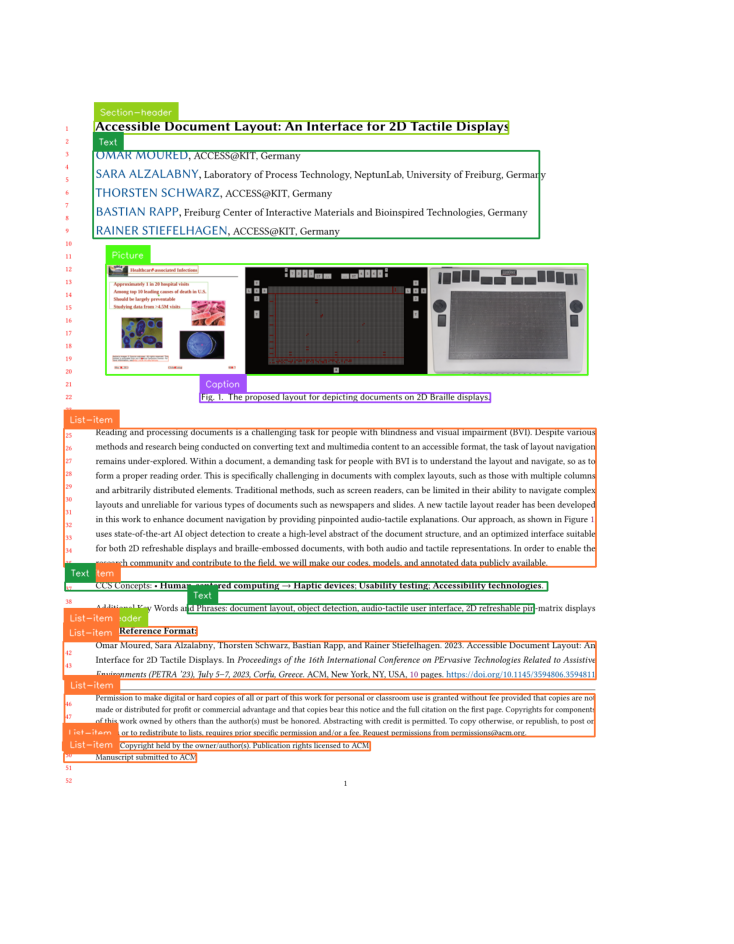

In [5]:
# show results with "supervision" library
# from supervision.annotators import BoundingBoxAnnotator

detections = sv.Detections.from_ultralytics(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [7]:
detections

Detections(xyxy=array([[     164.57,      435.82,      990.34,      625.98],
       [     144.33,      190.44,      854.25,         212],
       [     90.666,      1254.8,      617.19,      1269.2],
       [     91.906,      1082.7,      1004.1,      1147.9],
       [     92.708,      1274.4,      319.35,      1289.1],
       [     304.66,      1018.6,       898.1,      1034.3],
       [     94.635,      980.24,      921.24,       995.8],
       [     325.07,      656.99,      823.98,      672.62],
       [     92.173,      717.26,      1004.3,      954.64],
       [     92.173,      717.26,      1004.3,      954.64],
       [     325.07,      656.99,      823.98,      672.62],
       [     142.22,      241.74,      907.79,      391.06],
       [     94.635,      980.24,      921.24,       995.8],
       [      93.34,      1172.2,      1002.4,      1245.9],
       [     92.499,      1057.3,      320.37,      1072.7],
       [     92.499,      1057.3,      320.37,      1072.7]], dtype=f

In [14]:
results

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Caption', 1: 'Footnote', 2: 'Formula', 3: 'List-item', 4: 'Page-footer', 5: 'Page-header', 6: 'Picture', 7: 'Section-header', 8: 'Table', 9: 'Text', 10: 'Title'}
obb: None
orig_img: array([[[ 35,  72, 106],
        [ 33,  70, 104],
        [ 35,  72, 106],
        ...,
        [ 93, 130, 150],
        [ 88, 125, 145],
        [ 83, 120, 140]],

       [[ 37,  74, 108],
        [ 35,  72, 106],
        [ 27,  64,  98],
        ...,
        [ 94, 131, 151],
        [ 92, 129, 149],
        [ 89, 126, 146]],

       [[ 27,  62,  96],
        [ 31,  66, 100],
        [ 28,  65,  99],
        ...,
        [ 89, 126, 146],
        [ 88, 125, 145],
        [ 88, 125, 145]],

       ...,

       [[  7,  46,  84],
        [  5,  44,  82],
        [  6,  45,  83],
        ...,
        [ 80, 111, 134],
        [ 79, 110, 133],
        [ 81, 112, 135]],

# Testing on DIR300

In [12]:
warped_img_path = '/kaggle/input/dir300/DIR300/dist/1.png'
gt_img_path = '/kaggle/input/dir300/DIR300/gt/1.png'


image 1/1 /kaggle/input/dir300/DIR300/gt/1.png: 640x448 1 Page-footer, 2 Page-headers, 3 Section-headers, 3 Texts, 1244.9ms
Speed: 3.3ms preprocess, 1244.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)


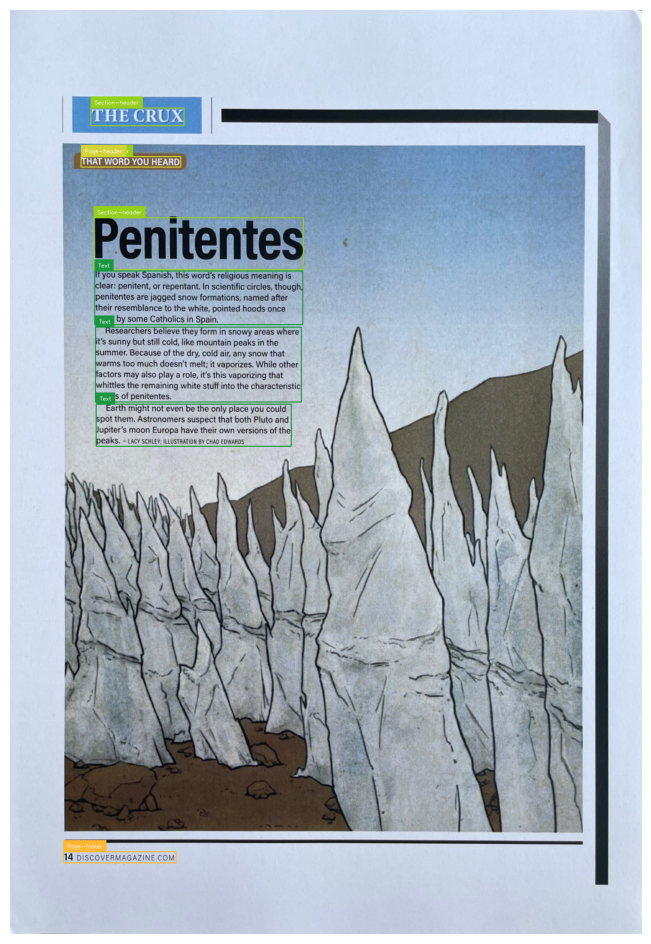


image 1/1 /kaggle/input/dir300/DIR300/dist/1.png: 640x480 1 Caption, 1 Section-header, 2 Texts, 1288.6ms
Speed: 3.5ms preprocess, 1288.6ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


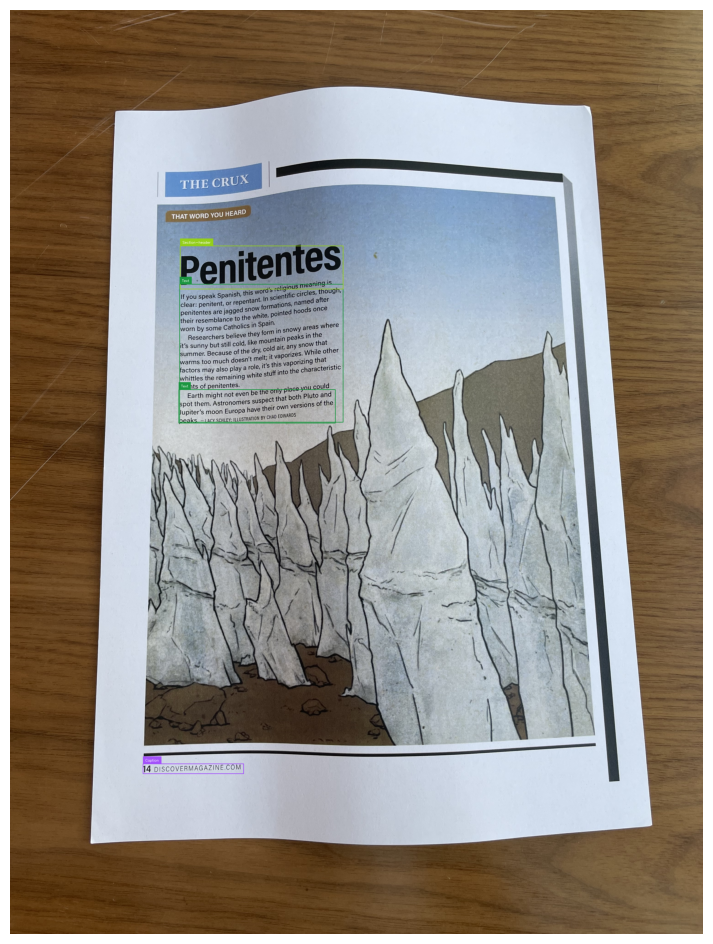

In [13]:
for path in [gt_img_path, warped_img_path]:
    image = cv2.imread(path)
    
    results = model(source=path, conf=0.2, iou=0.8)[0]
    
    detections = sv.Detections.from_ultralytics(results)
    
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()
    
    annotated_image = bounding_box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)
    
    sv.plot_image(annotated_image)